In [2]:
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 12s 1us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()

In [5]:
print('x_train_image:',x_Train.shape)
print('y_train_label:',y_Train.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [6]:
print('x_test_image:',x_Test.shape)
print('y_test_label:',y_Test.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


In [7]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

In [8]:
x_Train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

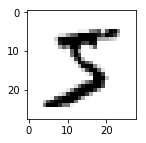

In [9]:
plot_image(x_Train[0])

In [10]:
y_Train[0]

5

In [16]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num=25 
    for i in range(0, num):
        ax=plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=", predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

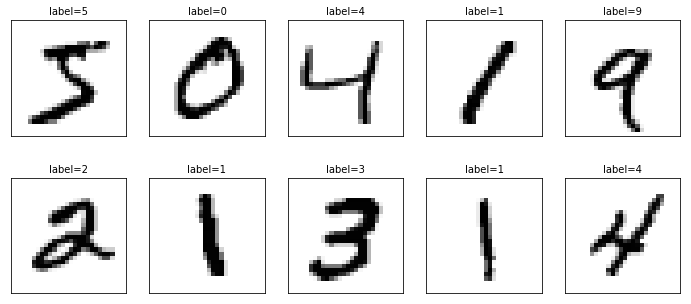

In [17]:
plot_images_labels_prediction(x_Train, y_Train, [], 0, 10)

In [18]:
x_Train4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D= x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [19]:
x_Train4D.shape

(60000, 28, 28, 1)

In [20]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [21]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

(60000, 28, 28, 1)

In [25]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [26]:
model = Sequential()

W0912 23:41:15.680423 4397020608 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [27]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

W0912 23:41:24.882236 4397020608 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0912 23:41:24.904410 4397020608 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [28]:
model.add(MaxPooling2D(pool_size=(2, 2)))

W0912 23:41:46.527973 4397020608 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [29]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [30]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [31]:
model.add(Dropout(0.25))

W0912 23:42:33.682410 4397020608 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0912 23:42:33.695049 4397020608 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [32]:
model.add(Flatten())

In [33]:
model.add(Dense(128, activation='relu'))

In [34]:
model.add(Dropout(0.5))

In [35]:
model.add(Dense(10,activation='softmax'))

In [36]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

W0912 23:46:05.139153 4397020608 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0912 23:46:05.178831 4397020608 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [38]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

W0912 23:46:22.370061 4397020608 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 77s - loss: 0.5035 - acc: 0.8416 - val_loss: 0.1015 - val_acc: 0.9695
Epoch 2/20
 - 60s - loss: 0.1364 - acc: 0.9592 - val_loss: 0.0629 - val_acc: 0.9809
Epoch 3/20
 - 55s - loss: 0.1008 - acc: 0.9694 - val_loss: 0.0494 - val_acc: 0.9844
Epoch 4/20
 - 55s - loss: 0.0815 - acc: 0.9759 - val_loss: 0.0415 - val_acc: 0.9872
Epoch 5/20
 - 55s - loss: 0.0681 - acc: 0.9791 - val_loss: 0.0376 - val_acc: 0.9884
Epoch 6/20
 - 52s - loss: 0.0586 - acc: 0.9826 - val_loss: 0.0366 - val_acc: 0.9892
Epoch 7/20
 - 53s - loss: 0.0516 - acc: 0.9842 - val_loss: 0.0318 - val_acc: 0.9906
Epoch 8/20
 - 53s - loss: 0.0477 - acc: 0.9847 - val_loss: 0.0323 - val_acc: 0.9902
Epoch 9/20
 - 54s - loss: 0.0438 - acc: 0.9863 - val_loss: 0.0339 - val_acc: 0.9898
Epoch 10/20
 - 54s - loss: 0.0407 - acc: 0.9877 - val_loss: 0.0291 - val_acc: 0.9904
Epoch 11/20
 - 52s - loss: 0.0373 - acc: 0.9881 - val_loss: 0.0317 - val_acc: 0.9905
Epoch 12/20
 - 51s - los

In [39]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

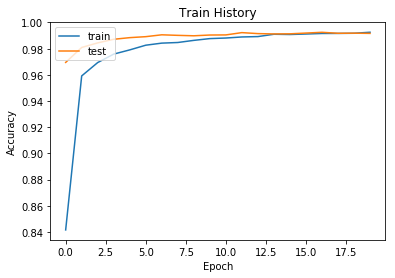

In [40]:
show_train_history('acc','val_acc')

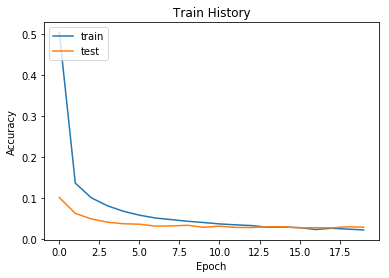

In [41]:
show_train_history('loss','val_loss')

In [42]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 5s 472us/step


0.9927

In [44]:
prediction=model.predict_classes(x_Test4D_normalize)

In [45]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

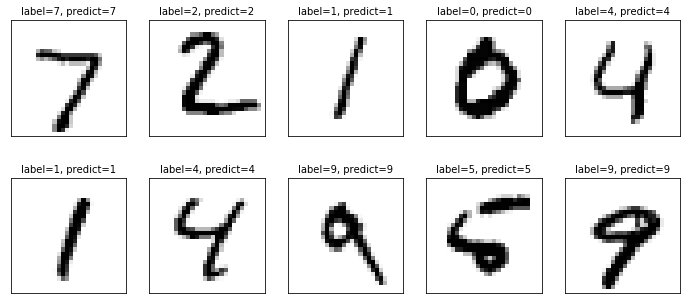

In [46]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

In [47]:
import pandas as pd
pd.crosstab(y_Test,prediction, rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,0,0,1,0,3,1,0,0
1,0,1134,1,0,0,0,0,0,0,0
2,1,1,1026,0,0,0,0,3,1,0
3,0,0,2,1001,0,5,0,0,2,0
4,0,0,0,0,980,0,0,0,0,2
5,1,0,0,4,0,886,1,0,0,0
6,2,2,1,0,1,2,950,0,0,0
7,0,2,2,0,0,0,0,1022,1,1
8,1,0,2,2,0,1,0,2,961,5


In [48]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [49]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
2035,5,3
5937,5,3


In [50]:

df[(df.label==5)&(df.predict==3)].index

Int64Index([340, 1393, 2035, 5937], dtype='int64')

IndexError: list index out of range

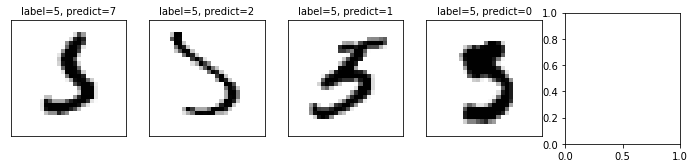

In [51]:
plot_images_labels_prediction([x_Test[i] for i in df[(df.label==5)&(df.predict==3)].index],[y_Test[i] for i in df[(df.label==5)&(df.predict==3)].index],prediction,idx=0)